In [39]:
#Imports

import tensorflow as tf
import numpy as np
import os,sys
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks')
from datasets import MNISTDataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Self.size =  60000


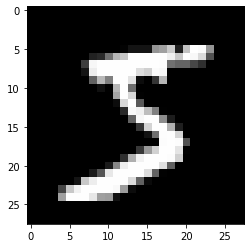

In [40]:
#Load Data

mnist = tf.keras.datasets.mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = mnist.load_data()
plt.imshow(train_imgs[0], cmap = "Greys_r")
data = MNISTDataset(train_imgs.reshape([-1, 784]), train_lbls, 
                    test_imgs.reshape([-1, 784]), test_lbls, batch_size=128)

In [41]:
#Training Setup

train_stps = 1000
learning_rate = 0.2
W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype = np.float32))

#Training

for step in range(train_stps):
  img_batch, lbl_batch = data.next_batch()
  with tf.GradientTape() as t:
    logits = tf.matmul(img_batch, W) + b
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits( 
                          logits = logits, labels = lbl_batch))
    grads = t.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))


Loss: 2.3025853633880615 Accuracy: 0.0703125
Loss: 0.4261838495731354 Accuracy: 0.890625
Loss: 0.5467398166656494 Accuracy: 0.828125
Loss: 0.3094102740287781 Accuracy: 0.8984375
Loss: 0.39234042167663574 Accuracy: 0.8671875
Starting new epoch...
Loss: 0.2544908821582794 Accuracy: 0.9296875
Loss: 0.2929832339286804 Accuracy: 0.9140625
Loss: 0.34601831436157227 Accuracy: 0.921875
Loss: 0.3860383629798889 Accuracy: 0.875
Loss: 0.34975874423980713 Accuracy: 0.8828125
Starting new epoch...


In [42]:
#Testing

test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.914, shape=(), dtype=float32)
